In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('/content/Fraud.csv')

In [20]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [27]:
df.shape

(151799, 11)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151799 entries, 0 to 151798
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            151799 non-null  int64  
 1   type            151799 non-null  object 
 2   amount          151799 non-null  float64
 3   nameOrig        151799 non-null  object 
 4   oldbalanceOrg   151799 non-null  float64
 5   newbalanceOrig  151798 non-null  float64
 6   nameDest        151798 non-null  object 
 7   oldbalanceDest  151798 non-null  float64
 8   newbalanceDest  151798 non-null  float64
 9   isFraud         151798 non-null  float64
 10  isFlaggedFraud  151798 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 12.7+ MB


In [29]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [30]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,151799.000000,1.517990e+05,1.517990e+05,1.517980e+05,1.517980e+05,1.517980e+05,151798.000000,151798.0
mean,9.333902,1.791774e+05,8.879109e+05,9.043402e+05,9.137641e+05,1.180076e+06,0.000863,0.0
std,1.906281,3.401606e+05,2.807531e+06,2.844268e+06,2.384389e+06,2.705635e+06,0.029364,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,9.000000,1.111398e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,10.000000,6.122687e+04,1.999000e+04,0.000000e+00,3.164400e+04,9.332977e+04,0.000000,0.0
75%,11.000000,2.230398e+05,1.956685e+05,2.262719e+05,6.869059e+05,1.120989e+06,0.000000,0.0
max,12.000000,1.000000e+07,3.893942e+07,3.894623e+07,3.490552e+07,3.894623e+07,1.000000,0.0


In [31]:
# checking for missing values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [32]:
df=df.dropna() #dropping nan values.

In [33]:
df.shape

(151798, 11)

In [34]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [35]:
df['type'].value_counts()

type
PAYMENT     57888
CASH_OUT    48858
CASH_IN     30820
TRANSFER    12851
DEBIT        1381
Name: count, dtype: int64

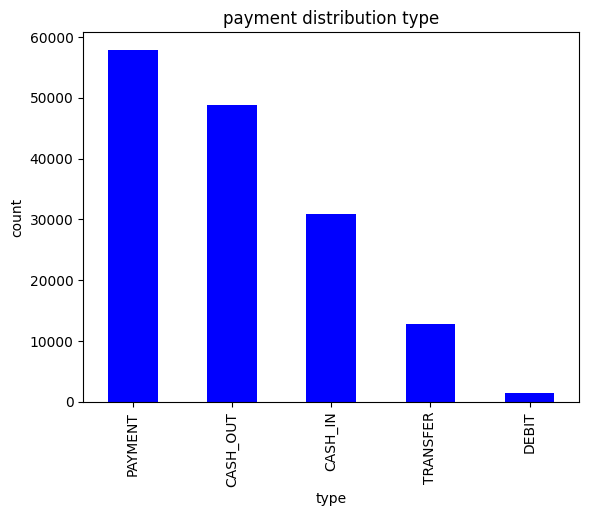

In [36]:
#bar graph to visualise total counts of type
df['type'].value_counts().plot.bar(color='blue')
plt.title('payment distribution type')
plt.xlabel('type')
plt.ylabel('count')
plt.show()

In [92]:
#Finding the percentage distribution of each type - we'll divide the number of records for each type by total number of records

print(f"type value count - percentage distribution: \n{round(df['type'].value_counts()/df.shape[0]*100,2)}")

type value count - percentage distribution: 
type
1    38.13
0    32.19
2    20.30
3     8.47
4     0.91
Name: count, dtype: float64


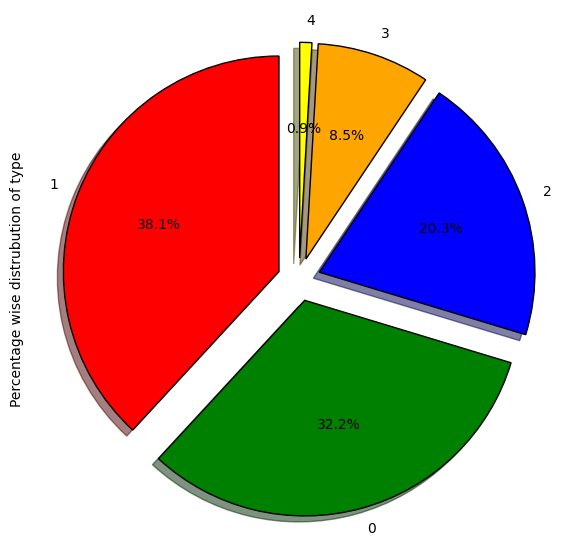

In [93]:
fig = plt.figure(figsize=(7,7))

colors = ('red', 'green', 'blue','orange','yellow')

wp = {'linewidth':1, "edgecolor":'black'}

tags = df['type'].value_counts()/df.shape[0]

explode=(0.1,0.1,0.1,0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of type')

from io import  BytesIO

graph = BytesIO()

fig.savefig(graph, format="png")

In [37]:
# encoding categorical variables in Type column
mapping = {'CASH_OUT':0,'PAYMENT':1,'CASH_IN':2,'TRANSFER':3,'DEBIT':4}
df['type'] = df['type'].map(mapping)

In [38]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,3,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,0,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [39]:
df.groupby('type')['amount'].mean()

type
0    201739.798054
1     11596.799535
2    178014.331034
3    869736.758422
4      5533.103237
Name: amount, dtype: float64

it shows the average amount transactions happened through type of payments.

In [40]:
df['nameOrig'].value_counts()

nameOrig
C260230637     2
C44568807      2
C1709295811    2
C1231006815    1
C1951441730    1
              ..
C81967001      1
C257455526     1
C1825075464    1
C1939698291    1
C1714697587    1
Name: count, Length: 151795, dtype: int64

In [41]:
df['nameOrig']=df['nameOrig'].str[1:]

In [42]:
df['nameOrig']

0         1231006815
1         1666544295
2         1305486145
3          840083671
4         2048537720
             ...    
151793    2121687771
151794    1003833784
151795     988075754
151796    1159606163
151797    1714697587
Name: nameOrig, Length: 151798, dtype: object

the column 'nameOrig' has no much effect on fraud detection as almost 98% values are unique values as it is a kind of account number of customer. so we can remove this column.

In [43]:
df=df.drop('nameOrig',axis=1)

In [44]:
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [45]:
df['nameDest']=df['nameDest'].str[:1]

In [46]:
df['nameDest'].value_counts()

nameDest
C    93910
M    57888
Name: count, dtype: int64

In [47]:
mapp = {'C':0,'M':1}
df['nameDest'] = df['nameDest'].map(mapp)

In [48]:
df['nameDest']

0         1
1         1
2         0
3         0
4         1
         ..
151793    1
151794    1
151795    1
151796    1
151797    1
Name: nameDest, Length: 151798, dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151798 entries, 0 to 151797
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            151798 non-null  int64  
 1   type            151798 non-null  int64  
 2   amount          151798 non-null  float64
 3   oldbalanceOrg   151798 non-null  float64
 4   newbalanceOrig  151798 non-null  float64
 5   nameDest        151798 non-null  int64  
 6   oldbalanceDest  151798 non-null  float64
 7   newbalanceDest  151798 non-null  float64
 8   isFraud         151798 non-null  float64
 9   isFlaggedFraud  151798 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 12.7 MB


by here, we converted all objects into numerical dtypes

In [50]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,170136.0,160296.36,1,0.0,0.0,0.0,0.0
1,1,1,1864.28,21249.0,19384.72,1,0.0,0.0,0.0,0.0
2,1,3,181.00,181.0,0.00,0,0.0,0.0,1.0,0.0
3,1,0,181.00,181.0,0.00,0,21182.0,0.0,1.0,0.0
4,1,1,11668.14,41554.0,29885.86,1,0.0,0.0,0.0,0.0


In [51]:
#checking for outliers
df['amount'].mean()

179178.56997667954

In [53]:
df['amount'].std()

340161.3944513384

In [54]:
df_upperlimit = df['amount'].mean() + 3* df['amount'].std()
df_upperlimit

1199662.7533306947

In [55]:
df_lowerlimit = df['amount'].mean() - 3* df['amount'].std()
df_lowerlimit

-841305.6133773357

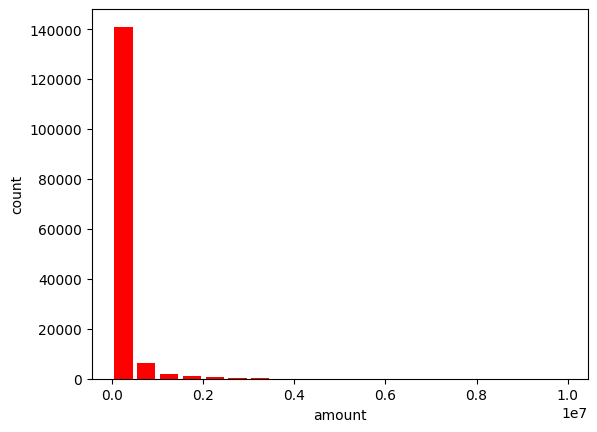

In [56]:
plt.hist(df.amount,bins=20,rwidth=0.8,color='red')
plt.xlabel('amount')
plt.ylabel('count')
plt.show()

In [57]:
df[df['amount']>df_upperlimit]

,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
85,1,3,1505626.01,0.00,0.0,0,29031.00,5515763.34,0.0,0.0
89,1,3,1429051.47,0.00,0.0,0,2041543.62,19169204.93,0.0,0.0
94,1,3,1724887.05,0.00,0.0,0,3470595.10,19169204.93,0.0,0.0
358,1,3,1538200.39,0.00,0.0,0,6977445.38,19169204.93,0.0,0.0
359,1,3,2421578.09,0.00,0.0,0,8515645.77,19169204.93,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
151657,12,3,3964129.99,3964129.99,0.0,0,0.00,0.00,1.0,0.0
151658,12,0,3964129.99,3964129.99,0.0,0,1912955.54,5811064.07,1.0,0.0
151676,12,3,2354882.28,2525.00,0.0,0,0.00,2354882.28,0.0,0.0
151702,12,3,1259092.93,21191.00,0.0,0,586626.82,1845719.76,0.0,0.0


In [58]:
df[df['amount']<df_lowerlimit]

,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [59]:
df_cleaned = df.copy()

In [60]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151798 entries, 0 to 151797
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            151798 non-null  int64  
 1   type            151798 non-null  int64  
 2   amount          151798 non-null  float64
 3   oldbalanceOrg   151798 non-null  float64
 4   newbalanceOrig  151798 non-null  float64
 5   nameDest        151798 non-null  int64  
 6   oldbalanceDest  151798 non-null  float64
 7   newbalanceDest  151798 non-null  float64
 8   isFraud         151798 non-null  float64
 9   isFlaggedFraud  151798 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 12.7 MB


In [61]:
# function to remove all the outliers from the features
def remove_outliers(df):
    # Copy the DataFrame to avoid modifying the original one
    df_cleaned = df.copy()

    # Iterate over each column in the DataFrame
    for col in df_cleaned.columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)

        # Calculate the IQR
        IQR = Q3 - Q1

        # Define the lower and upper bound for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter the DataFrame to remove outliers
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

    return df_cleaned


In [62]:
new_df = remove_outliers(df)

In [63]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71692 entries, 5504 to 151789
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            71692 non-null  int64  
 1   type            71692 non-null  int64  
 2   amount          71692 non-null  float64
 3   oldbalanceOrg   71692 non-null  float64
 4   newbalanceOrig  71692 non-null  float64
 5   nameDest        71692 non-null  int64  
 6   oldbalanceDest  71692 non-null  float64
 7   newbalanceDest  71692 non-null  float64
 8   isFraud         71692 non-null  float64
 9   isFlaggedFraud  71692 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 6.0 MB


In [64]:
new_df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5504,6,1,4964.82,5676.00,711.18,1,0.0,0.0,0.0,0.0
5505,6,1,1993.69,711.18,0.00,1,0.0,0.0,0.0,0.0
5506,6,1,4466.25,45837.00,41370.75,1,0.0,0.0,0.0,0.0
5507,6,1,3092.92,41370.75,38277.84,1,0.0,0.0,0.0,0.0
5508,6,1,3440.78,11264.00,7823.22,1,0.0,0.0,0.0,0.0


**Variable Selection**

Variables were selected based on their relevance to fraud detection. Key transactional features like amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, and newbalanceDest are critical. The type of transaction is also a significant predictor.

**Modelling**

In [66]:
#Storing independent and dependent variables in X and y
X = df.drop('isFraud',axis=1)
y = df['isFraud']

In [67]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (151798, 9)
y shape: (151798,)


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (106258, 9)
y train: (106258,)
X test: (45540, 9)
y test: (45540,)


In [71]:
scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [95]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

**Random Forest**

In [75]:
#Fitting scaled X_train and y_train on Random Forest Classifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl, y_train)

RandomForestClassifier()

In [76]:
#Accuracy of the model on training and testing data

print("Training Accuracy :", model_rf.score(X_train_scl, y_train))
print("Testing Accuracy :", model_rf.score(X_test_scl, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.999582784365393


#### With Random forest model, we achieved a training accuracy of 100% and testing accuracy of 99.95%.

In [77]:
#Predicting on the test set
y_preds = model_rf.predict(X_test_scl)

In [96]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
cr = classification_report(y_test,y_preds)

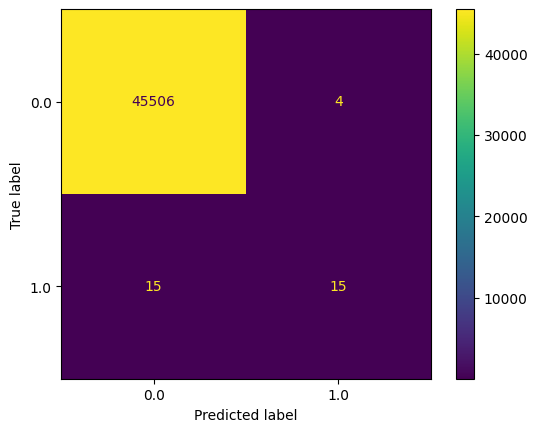

In [79]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)
cm_display.plot()
plt.show()

In [98]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96     45510
         1.0       0.00      0.50      0.01        30

    accuracy                           0.92     45540
   macro avg       0.50      0.71      0.48     45540
weighted avg       1.00      0.92      0.96     45540



In [80]:
accuracies = cross_val_score(estimator = model_rf, X = X_train_scl, y = y_train, cv = 10)

print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.999463569269605
Standard Variance : 0.00020640137519427625


 **Model Performance**

We demonstrated the performance using classification metrics like precision, recall, F1-score, confusion matrix, and ROC AUC score. These metrics give a comprehensive view of the model's effectiveness in detecting fraud.

**Hyperparameter optimisation using Grid searchCV method**

In [81]:
params = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}

In [82]:
cv_object = StratifiedKFold(n_splits = 2)

grid_search = GridSearchCV(estimator = model_rf, param_grid = params, cv = cv_object, verbose = 0, return_train_score = True)
grid_search.fit(X_train_scl, y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True)

In [83]:
#Getting the best parameters from the grid search


print("Best Parameter Combination : {}".format(grid_search.best_params_))

Best Parameter Combination : {'bootstrap': True, 'max_depth': 100, 'min_samples_split': 8, 'n_estimators': 100}


In [84]:
print("Cross validation mean accuracy on train set : {}".format(grid_search.cv_results_['mean_train_score'].mean()*100))
print("Cross validation mean accuracy on test set : {}".format(grid_search.cv_results_['mean_test_score'].mean()*100))
print("Accuracy score for test set :", accuracy_score(y_test, y_preds))

Cross validation mean accuracy on train set : 99.97658999792957
Cross validation mean accuracy on test set : 99.93541662745393
Accuracy score for test set : 0.999582784365393


**XG Boost**

In [85]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train_scl, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [86]:
#Accuracy of the model on training and testing data

print("Training Accuracy :", model_xgb.score(X_train_scl, y_train))
print("Testing Accuracy :", model_xgb.score(X_test_scl, y_test))

Training Accuracy : 0.9999811778877825
Testing Accuracy : 0.9996706192358367


In [87]:
y_preds = model_xgb.predict(X_test)

In [88]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[41818  3692]
 [   15    15]]


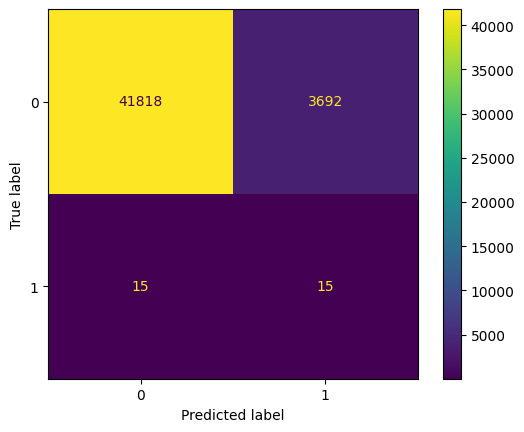

In [89]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_xgb.classes_)
cm_display.plot()
plt.show()

In [90]:
accuracies = cross_val_score(estimator = model_rf, X = X_train_scl, y = y_train, cv = 10)

print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.999454158390629
Standard Variance : 0.00019194953979759433


 **Key Predictive Factors**

Key factors predicting fraudulent activities typically include:

* Transaction amount (amount)
* Differences in balances before and after the transaction (oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest)
* Transaction type (type)

 **Interpretation of Factors**

These factors make sense as large or unusual transactions, and significant changes in balances are often indicative of fraudulent activities. The type of transaction can also signal potential fraud, e.g., cash-out transactions are more likely to be fraudulent.

**Prevention Measures**
To prevent fraud, the company should:

* Implement real-time monitoring and alert systems for suspicious transactions.
* Use machine learning models to continuously learn and adapt to new fraud patterns.
* Employ multi-factor authentication to verify the identity of users.
* Regularly update security protocols and infrastructure.

**Determining Effectiveness**
To determine if these actions work, the company can:

* Monitor the reduction in the number of successful fraud attempts.
* Track improvements in detection rates and reduction in false positives.
* Analyze user feedback and reports on transaction issues.
* Conduct periodic audits and reviews of the fraud detection system.

By implementing and monitoring these steps, the company can improve its fraud detection capabilities and maintain a secure transactional environment.